# **Welcome to the GSoC 2020 TARDIS Challenge!**

This challenge aims to inform potential applicants about the science mission of the TARDIS Collaboration. It is also an opportunity to demostrate your creativity and resourcefulness while solving problems. 

**Let's begin!**

First we need to install some dependencies and download some data. Please run each cell in order by pressing shift-enter. 

In [35]:
!pip install numpy==1.15.4
!pip install --upgrade tables
#You might be asked to restart runtime. Please do so. 

     |████████████████████████████████| 13.9MB 296kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.15.4 which is incompatible.
ERROR: pyerfa 1.7.2 has requirement numpy>=1.16, but you'll have numpy 1.15.4 which is incompatible.
ERROR: pyarrow 3.0.0 has requirement numpy>=1.16.6, but you'll have numpy 1.15.4 which is incompatible.
ERROR: plotnine 0.6.0 has requirement numpy>=1.16.0, but you'll have numpy 1.15.4 which is incompatible.
ERROR: jaxlib 0.1.64+cuda110 has requirement numpy>=1.16, but you'll have numpy 1.15.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: astropy 4.2 has requirement numpy>=1.17, but you'll have numpy 1.15.4 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successf

     |████████████████████████████████| 4.3MB 4.1MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [36]:
# Download the atomic data

!wget "https://github.com/tardis-sn/tardis-refdata/raw/master/atom_data/kurucz_cd23_chianti_H_He.h5"

--2021-04-10 16:48:57--  https://github.com/tardis-sn/tardis-refdata/raw/master/atom_data/kurucz_cd23_chianti_H_He.h5
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/tardis-sn/tardis-refdata/master/atom_data/kurucz_cd23_chianti_H_He.h5 [following]
--2021-04-10 16:48:57--  https://media.githubusercontent.com/media/tardis-sn/tardis-refdata/master/atom_data/kurucz_cd23_chianti_H_He.h5
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73704476 (70M) [application/octet-stream]
Saving to: ‘kurucz_cd23_chianti_H_He.h5’

kurucz_cd23_chianti 100%[===================>]  70.29M  24.9MB/s    i

In [37]:
#Read in atomic data using pandas

import pandas as pd

data = pd.HDFStore('kurucz_cd23_chianti_H_He.h5')


In [38]:
# Different datasets are stored in the h5 file

set(data)

{'/atom_data',
 '/collision_data',
 '/collision_data_temperatures',
 '/ionization_data',
 '/levels',
 '/lines',
 '/macro_atom_data',
 '/macro_atom_references',
 '/zeta_data'}

---

#### When a star ends its life in a supernova explosion it releases a huge amount of material we call **ejecta**. 

<img src="https://en.es-static.us/upl/2015/01/supernova-artist-e1493935487104.jpg" width="500" height="500">


#### The ejecta is made up of lots of different elements. As light travels through the ejecta it gets absorbed and emitted many times by different atoms before leaving the ejecta and traveling through space to reach our telescopes. 


--- 
#### Supernova light then goes through a prism-like instrument that spreads out the light into different colors or wavelengths. The spread out light is called a **spectrum**. 


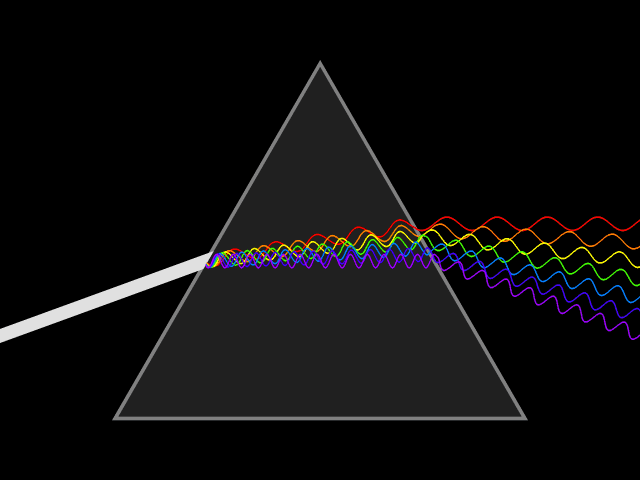


#### TARDIS is able to create a simulated supernova spectrum that astronomers use to study the physics of exploding stars. 

#### The atomic data we just downloaded is an integral part of the TARDIS code. It is used everytime a user tries to make simulated supernova spectrum. 

In [39]:
data['atom_data']

,symbol,name,mass
atomic_number,,,
1,H,Hydrogen,1.007975
2,He,Helium,4.002602
3,Li,Lithium,6.967500
4,Be,Beryllium,9.012183
5,B,Boron,10.813500
6,C,Carbon,12.010600
7,N,Nitrogen,14.006855
8,O,Oxygen,15.999400
9,F,Fluorine,18.998403


---

# TASK #1 
**Background**

- Iron Group Elements (IGE) are Cr, Mn, Fe, Co, Ni. They are particularly important elements that are found in the ejecta of supernovas. 

***Mission A*: Make a new pandas dataframe with elements that have atomic masses between 51 and 60 (Iron Group Elements)**


In [40]:
# Let's grab all the elements with masses between 51 and 60 (Iron group elements)

Iron_group_elements = data['atom_data'][data['atom_data']['mass'].between(51, 60, inclusive=False)]


In [41]:
# Print out the new dataframe called Iron_group_elements

Iron_group_elements

,symbol,name,mass
atomic_number,,,
24,Cr,Chromium,51.996100
25,Mn,Manganese,54.938044
26,Fe,Iron,55.845000
27,Co,Cobalt,58.933194
28,Ni,Nickel,58.693400


<details>
  <summary>Hint!</summary>
  

*   Make conditions to create a series object
*   ie. data['atom_data']['mass'] > 50


</details>

***Mission B*: Add a new column called IGE to data['atom_data']** *Optional challenge*

- The IGE(Iron Group Elements) value can either be 1 or True if the element is an IGE , or 0 or False if it is not an IGE. 

In [42]:
df = data['atom_data']
# Add new column called IGE to df 
dk=pd.DataFrame(data['atom_data']['mass'].between(51, 60, inclusive=False))
dk.rename(columns={'mass':'IGE'}, inplace=True)
df=pd.concat([df,dk],axis=1)

In [43]:
# Print out the new dataframe with IGE column
df

,symbol,name,mass,IGE
atomic_number,,,,
1,H,Hydrogen,1.007975,False
2,He,Helium,4.002602,False
3,Li,Lithium,6.967500,False
4,Be,Beryllium,9.012183,False
5,B,Boron,10.813500,False
6,C,Carbon,12.010600,False
7,N,Nitrogen,14.006855,False
8,O,Oxygen,15.999400,False
9,F,Fluorine,18.998403,False


---

# TASK #2

**Background**
 - Radioactive Nickel-56 is produced in large quantities in supernovas. A lot of the supernova light (photons) that we see comes from the decay of nickel-56 to cobalt-56

 - Ni$^{56}$ $\rightarrow$  Co$^{56}$ + $\gamma$ (photons) + $\nu$ (neutrinos)

 - Total energy emitted via $\gamma$ photons = 1.75 MeV (Mega electron volts) 
 - Total energy emitted via $\nu$ neutrinos = 0.41 MeV (Mega electron volts)

**Mission: Make a function that takes in the number of nickel-56 and outputs the energy released by photons and neutrinos** 

In [44]:
def Ni56toCo56 (Ni56):
  # Function that inputs number of Ni56 atoms and outputs energy of photons and neutrinos
  E_photons = "{:.3e}".format(1.75*Ni56)
  E_neutrinos = "{:.3e}".format(0.41*Ni56)
  # Optional:
  # Try to return E_photons and E_neutrinos in scientific notation with 4 significant figures (ie. 1750000.0 --> 1.750e6)
  #

  return E_photons, E_neutrinos

In [45]:
# Test your function here

# Number of Nickel-56 atoms 
Ni56_number = 10**6
E_photons, E_neutrinos = Ni56toCo56(Ni56_number)

In [46]:
# Results 
print('E_photons = ', E_photons, 'MeV')
print('E_neutrinos = ', E_neutrinos, 'MeV')

E_photons =  1.750e+06 MeV
E_neutrinos =  4.100e+05 MeV


--- 

# TASK #3

**Background**
 - Supernovas can release up to 1.2  solar masses of Nickel-56 (meaning they can release more mass than is in our Sun!)
 
 - We will assume that all of the Nickel-56 decays and releases energy

**Mission: How much TOTAL energy is released by Ni56 in a supernova?**

 

Feel free to solve this problem using whatever method you would like

In [47]:
# If you want to use the function from Task 2, you will need to find out how many Nickel 56 atoms are in 1.2 solar masses
def sol_masstoNi (sol_mass):
  E_photons, E_neutrinos = Ni56toCo56((sol_mass*1.198*10**(57))/56)
  E_photonsexp = int(E_photons[E_photons.find('e')+2:])
  E_photons = float(E_photons[:E_photons.find('e')])
  E_neutrinosexp = int(E_neutrinos[E_neutrinos.find('e')+2:])
  E_neutrinos = float(E_neutrinos[:E_neutrinos.find('e')])
  if (E_photonsexp > E_neutrinosexp):
    E_photons = E_photons*(10**(E_photons-E_neutrinos))
  return (E_photons+E_neutrinos)*(10**E_neutrinosexp)
 

<details>
  <summary>Hint!</summary>
  
*   Create a function that will convert solar_mass to Ni56_number
*   1 solar mass = 1.198*10^(57) Daltons (atomic mass units)
*   There are ~ 56 atomic mass units in Nickel-56


</details>

In [48]:
# Calculate total energy released (Assuming you used the Ni56toCo56 function from Task 2 )

E_total = "{:.3e}".format(sol_masstoNi(1.2))

In [49]:
# Print results

print('Energy release by Ni56 in a supernova = ', E_total, ' MeV')
print('    ')
print('For comparison:') 
print('Energy released by the most powerful nuclear weapon ever detonated is 1.3e30 MeV')

Energy release by Ni56 in a supernova =  5.546e+55  MeV
    
For comparison:
Energy released by the most powerful nuclear weapon ever detonated is 1.3e30 MeV


### Finished! 
## You figured out that supernovas are some of the most powerful explosions in the Universe!